# Project Group 1, TASKS 6 TO 9

Tasks with For-Hire Vehicle (FHV) companies (10 files of raw data on pickups from 10 FHV companies. The trip information varies by company, but can include day of trip, time of trip, pickup location, driver's for-hire license number, and vehicle's for-hire license number.)

- Task 6. Find the most frequent address names from adress column for all companies (word count in strings) [Axel]
    
- Task 7. Find frequent times like the one in Uber section [Axel]
    
- Task 8. Find the most customer intensive neighborhoods [Naeim]
 
- Task 9. Scalability tasks! [Naeim]


In [1]:
# To run the code on local machine or on server
server_mode = False

In [2]:
from pyspark.sql import SparkSession
if server_mode:
    #New API
    spark_session = SparkSession\
            .builder\
            .master("spark://192.168.2.74:7077") \
            .appName("Project_G1_Naeim")\
            .config("spark.dynamicAllocation.enabled", True)\
            .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
            .config("spark.shuffle.service.enabled", False)\
            .config("spark.dynamicAllocation.executorIdleTimeout","300s")\
            .config("spark.cores.max",5)\
            .config("spark.cores.min",5)\
            .config("spark.driver.port",9998)\
            .config("spark.blockManager.port",10005)\
            .getOrCreate()

    # Old API (RDD)
    spark_context = spark_session.sparkContext
    spark_context.setLogLevel("ERROR")
    # spark_context.setLogLevel("INFO")
    
else:
    # local version, deactivate later!
    spark_session = SparkSession.builder.appName('Project_G1_FHV').getOrCreate()
    spark_context = spark_session.sparkContext

22/03/18 14:07:00 WARN Utils: Your hostname, nanook resolves to a loopback address: 127.0.1.1; using 192.168.0.197 instead (on interface wlp9s0)
22/03/18 14:07:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/18 14:07:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark_session

In [4]:
import os
if server_mode:
    path = 'hdfs://192.168.2.74:9000/user/ubuntu/uber-tlc-foil-response/other-FHV-data'
else:
    path = os.getcwd() + '/DATA/'
FHV_file = path+'FHV_10_companies_data.parquet'
FHV_10_companies_data = spark_session.read.parquet(FHV_file)

In [5]:
from pyspark.sql.functions import upper, col
FHV_10_companies_data = FHV_10_companies_data.withColumn("PICK_UP_ADDRESS", upper(col("PICK_UP_ADDRESS")))

In [6]:
FHV_10_companies_data.show(10)

+--------+----+----------------+
|    DATE|TIME| PICK_UP_ADDRESS|
+--------+----+----------------+
|7/1/2014|0:00| 260 W 44 ST NYC|
|7/1/2014|0:00| 125 W 29 ST NYC|
|7/1/2014|0:00| 141 W 28 ST NYC|
|7/1/2014|0:01|             EWR|
|7/1/2014|0:07|             JFK|
|7/1/2014|0:07|             EWR|
|7/1/2014|0:11|             JFK|
|7/1/2014|0:12|             EWR|
|7/1/2014|0:15|             EWR|
|7/1/2014|0:15|206 W 109 ST NYC|
+--------+----+----------------+
only showing top 10 rows



In [7]:
FHV_10_companies_data.count()

1409080

In [8]:
fhv_test = FHV_10_companies_data.limit(100000) #test on smaller number of rows
fhv_test.printSchema()
fhv_test.show(10)

root
 |-- DATE: string (nullable = true)
 |-- TIME: string (nullable = true)
 |-- PICK_UP_ADDRESS: string (nullable = true)

+--------+----+----------------+
|    DATE|TIME| PICK_UP_ADDRESS|
+--------+----+----------------+
|7/1/2014|0:00| 260 W 44 ST NYC|
|7/1/2014|0:00| 125 W 29 ST NYC|
|7/1/2014|0:00| 141 W 28 ST NYC|
|7/1/2014|0:01|             EWR|
|7/1/2014|0:07|             JFK|
|7/1/2014|0:07|             EWR|
|7/1/2014|0:11|             JFK|
|7/1/2014|0:12|             EWR|
|7/1/2014|0:15|             EWR|
|7/1/2014|0:15|206 W 109 ST NYC|
+--------+----+----------------+
only showing top 10 rows



In [9]:
from pyspark.sql.functions import upper, col
fhv_test = fhv_test.withColumn("PICK_UP_ADDRESS", upper(col("PICK_UP_ADDRESS")))
fhv_test.show(10)

+--------+----+----------------+
|    DATE|TIME| PICK_UP_ADDRESS|
+--------+----+----------------+
|7/1/2014|0:00| 260 W 44 ST NYC|
|7/1/2014|0:00| 125 W 29 ST NYC|
|7/1/2014|0:00| 141 W 28 ST NYC|
|7/1/2014|0:01|             EWR|
|7/1/2014|0:07|             JFK|
|7/1/2014|0:07|             EWR|
|7/1/2014|0:11|             JFK|
|7/1/2014|0:12|             EWR|
|7/1/2014|0:15|             EWR|
|7/1/2014|0:15|206 W 109 ST NYC|
+--------+----+----------------+
only showing top 10 rows



In [10]:
from pyspark.sql.functions import udf, regexp_replace
import re
regex_udf = udf(lambda x: re.sub(r"[\d]{1,3}\s", "",re.sub(r"\sE\s|\sN\s|\sW\s|\sN\s", " ", x)).split()[0].strip())
fhv_test.show(10)
fhv_test = fhv_test.withColumn("PICK_UP_ADDRESS", regex_udf(col("PICK_UP_ADDRESS")))
fhv_test.show(10)

+--------+----+----------------+
|    DATE|TIME| PICK_UP_ADDRESS|
+--------+----+----------------+
|7/1/2014|0:00| 260 W 44 ST NYC|
|7/1/2014|0:00| 125 W 29 ST NYC|
|7/1/2014|0:00| 141 W 28 ST NYC|
|7/1/2014|0:01|             EWR|
|7/1/2014|0:07|             JFK|
|7/1/2014|0:07|             EWR|
|7/1/2014|0:11|             JFK|
|7/1/2014|0:12|             EWR|
|7/1/2014|0:15|             EWR|
|7/1/2014|0:15|206 W 109 ST NYC|
+--------+----+----------------+
only showing top 10 rows



+--------+----+---------------+
|    DATE|TIME|PICK_UP_ADDRESS|
+--------+----+---------------+
|7/1/2014|0:00|             ST|
|7/1/2014|0:00|             ST|
|7/1/2014|0:00|             ST|
|7/1/2014|0:01|            EWR|
|7/1/2014|0:07|            JFK|
|7/1/2014|0:07|            EWR|
|7/1/2014|0:11|            JFK|
|7/1/2014|0:12|            EWR|
|7/1/2014|0:15|            EWR|
|7/1/2014|0:15|             ST|
+--------+----+---------------+
only showing top 10 rows



# Task 6

In [11]:
from pyspark.sql.functions import desc
popular_streets = fhv_test.groupBy("PICK_UP_ADDRESS").count().sort(desc("Count"))
popular_streets.show(20)

+---------------+-----+
|PICK_UP_ADDRESS|count|
+---------------+-----+
|             ST|32579|
|            JFK|10792|
|            LGA| 8936|
|            EWR| 5817|
|            AVE| 4178|
|           WEST| 2588|
|           PARK| 1376|
|      RIVERSIDE| 1126|
|           1AVE|  882|
|      1BROADWAY|  877|
|        CENTRAL|  869|
|           EAST|  841|
|       BROADWAY|  766|
|        MADISON|  739|
|          1YORK|  623|
|      LEXINGTON|  607|
|     WASHINGTON|  540|
|      2BROADWAY|  404|
|       COLUMBUS|  352|
|        1AVENUE|  319|
+---------------+-----+
only showing top 20 rows



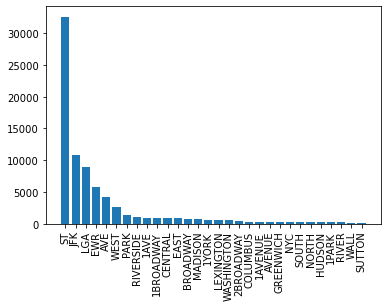

In [12]:
import matplotlib.pyplot as plt
max_points = 30
names = [row[0] for row in popular_streets.collect()][:max_points]
counts = [row[1] for row in popular_streets.collect()][:max_points]
plt.bar(range(max_points), counts, tick_label=names)

plt.xticks(rotation=90)
plt.show()

# Task 7

In [13]:
popular_times = fhv_test.groupBy("TIME").count().sort(desc("count"))
popular_times.show(30)

+-----+-----+
| TIME|count|
+-----+-----+
|15:00| 1782|
|14:00| 1720|
|16:00| 1653|
| 6:00| 1602|
| 8:00| 1532|
| 9:00| 1523|
|13:00| 1452|
|14:30| 1436|
| 8:30| 1416|
|10:00| 1408|
|17:00| 1397|
| 7:00| 1373|
| 5:00| 1372|
|15:30| 1372|
| 6:30| 1367|
|11:00| 1335|
|12:00| 1265|
| 5:30| 1261|
|13:30| 1258|
| 7:30| 1237|
| 9:30| 1236|
|16:30| 1193|
|18:00| 1191|
|17:30| 1169|
|10:30| 1157|
|12:30| 1119|
| 4:30| 1052|
|11:30|  970|
| 6:45|  953|
| 6:15|  896|
+-----+-----+
only showing top 30 rows



In [14]:
def uniform_time(t):
    pm = False
    if "PM" in t:
        pm = True
    t = ":".join(t.split(":")[:2])
    if len(t) != 5:
        t = "0"+t
    if pm:
        t = str(int(t[:2])+12)+t[2:]
    return t
regex_udf = udf(lambda x: uniform_time(x))

time_uniform = fhv_test.withColumn("TIME", regex_udf(col("TIME"))).groupBy("TIME").count().sort(desc("count"))
time_uniform.show(10)

+-----+-----+
| TIME|count|
+-----+-----+
|15:00| 1782|
|14:00| 1720|
|16:00| 1653|
|06:00| 1602|
|08:00| 1532|
|09:00| 1523|
|13:00| 1452|
|14:30| 1436|
|08:30| 1416|
|10:00| 1408|
+-----+-----+
only showing top 10 rows



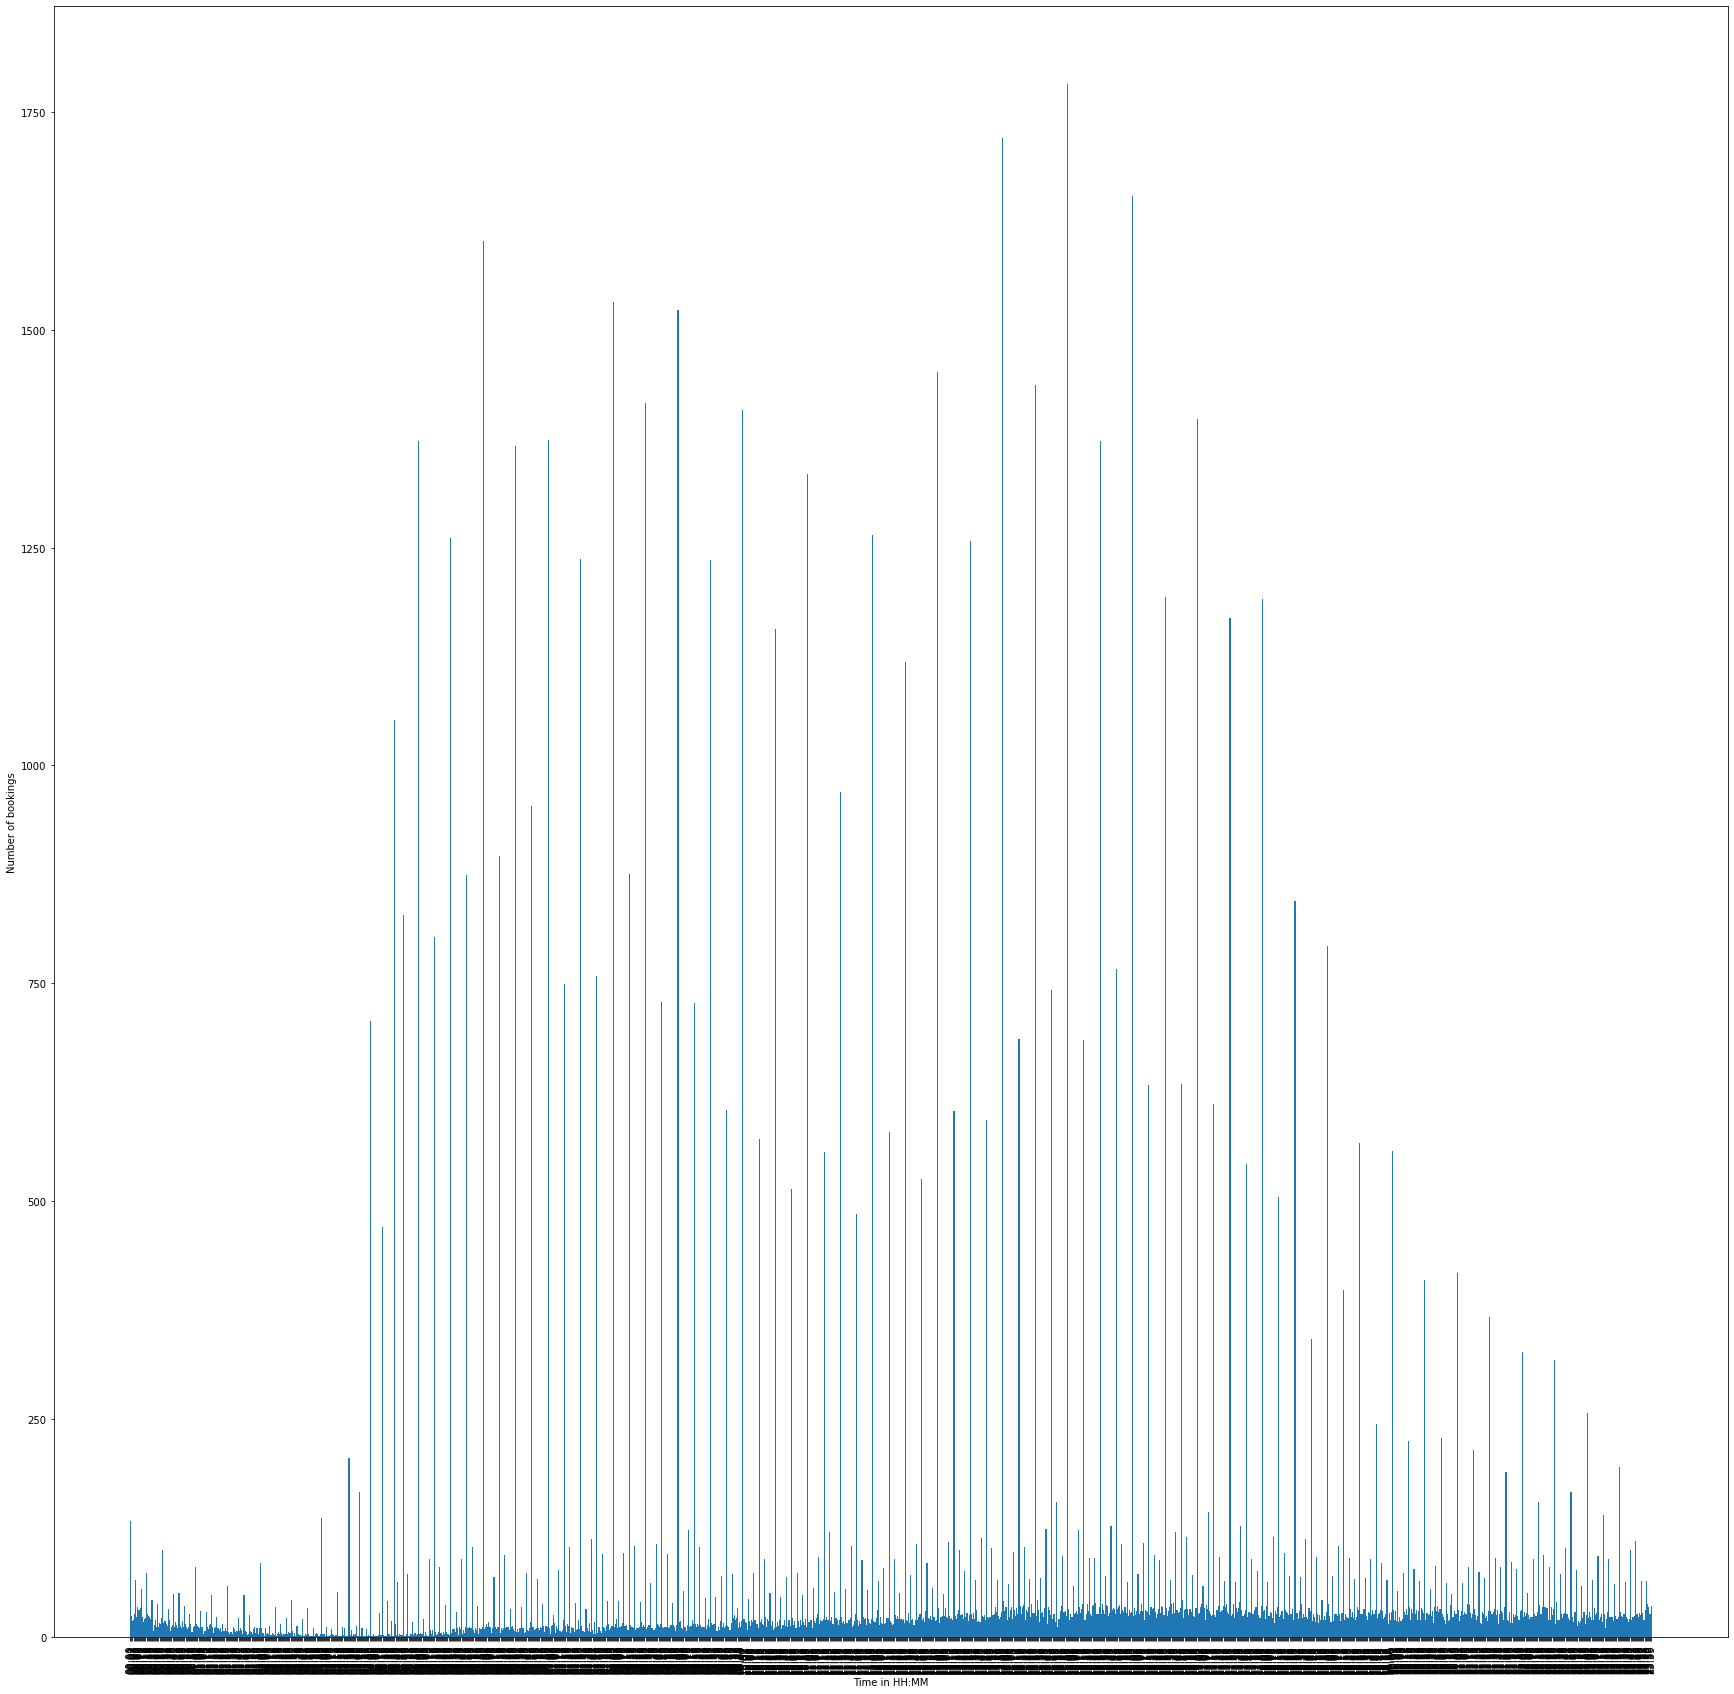

In [15]:
import matplotlib.pyplot as plt
names = [row[0] for row in time_uniform.collect()]
counts = [row[1] for row in time_uniform.collect()]
zipped = list(zip(names, counts))
zipped.sort(key=lambda x: x[0])
names = [e[0] for e in zipped]
counts = [e[1] for e in zipped]
plt.subplots(figsize=(30,30))
plt.bar(range(len(names)), counts, tick_label=names, width=1.0)

plt.ylabel("Number of bookings")
plt.xlabel("Time in HH:MM")
plt.xticks(rotation=90)
plt.show()

In [16]:
def round_time(t):
    pm = False
    if "PM" in t:
        pm = True
    t = ":".join(t.split(":")[:2])
    t = t[:-1]+str(int(t[-1:])//5*5)
    if len(t) != 5:
        t = "0"+t
    if pm:
        t = str(int(t[:2])+12)+t[2:]
    return t
regex_udf = udf(lambda x: round_time(x))
fhv_test.show(10)
time_trunc = fhv_test.withColumn("TIME", regex_udf(col("TIME")))
time_trunc.show(10)

+--------+----+---------------+
|    DATE|TIME|PICK_UP_ADDRESS|
+--------+----+---------------+
|7/1/2014|0:00|             ST|
|7/1/2014|0:00|             ST|
|7/1/2014|0:00|             ST|
|7/1/2014|0:01|            EWR|
|7/1/2014|0:07|            JFK|
|7/1/2014|0:07|            EWR|
|7/1/2014|0:11|            JFK|
|7/1/2014|0:12|            EWR|
|7/1/2014|0:15|            EWR|
|7/1/2014|0:15|             ST|
+--------+----+---------------+
only showing top 10 rows

+--------+-----+---------------+
|    DATE| TIME|PICK_UP_ADDRESS|
+--------+-----+---------------+
|7/1/2014|00:00|             ST|
|7/1/2014|00:00|             ST|
|7/1/2014|00:00|             ST|
|7/1/2014|00:00|            EWR|
|7/1/2014|00:05|            JFK|
|7/1/2014|00:05|            EWR|
|7/1/2014|00:10|            JFK|
|7/1/2014|00:10|            EWR|
|7/1/2014|00:15|            EWR|
|7/1/2014|00:15|             ST|
+--------+-----+---------------+
only showing top 10 rows



In [17]:
popular_times_trunced = time_trunc.groupBy("TIME").count().sort(desc("count"))
popular_times_trunced.show(20)

+-----+-----+
| TIME|count|
+-----+-----+
|15:00| 1884|
|14:00| 1845|
|16:00| 1765|
|06:00| 1648|
|08:00| 1590|
|09:00| 1577|
|14:30| 1551|
|13:00| 1548|
|17:00| 1523|
|15:30| 1493|
|10:00| 1470|
|08:30| 1465|
|07:00| 1414|
|11:00| 1401|
|06:30| 1398|
|05:00| 1387|
|13:30| 1355|
|12:00| 1353|
|16:30| 1314|
|18:00| 1309|
+-----+-----+
only showing top 20 rows



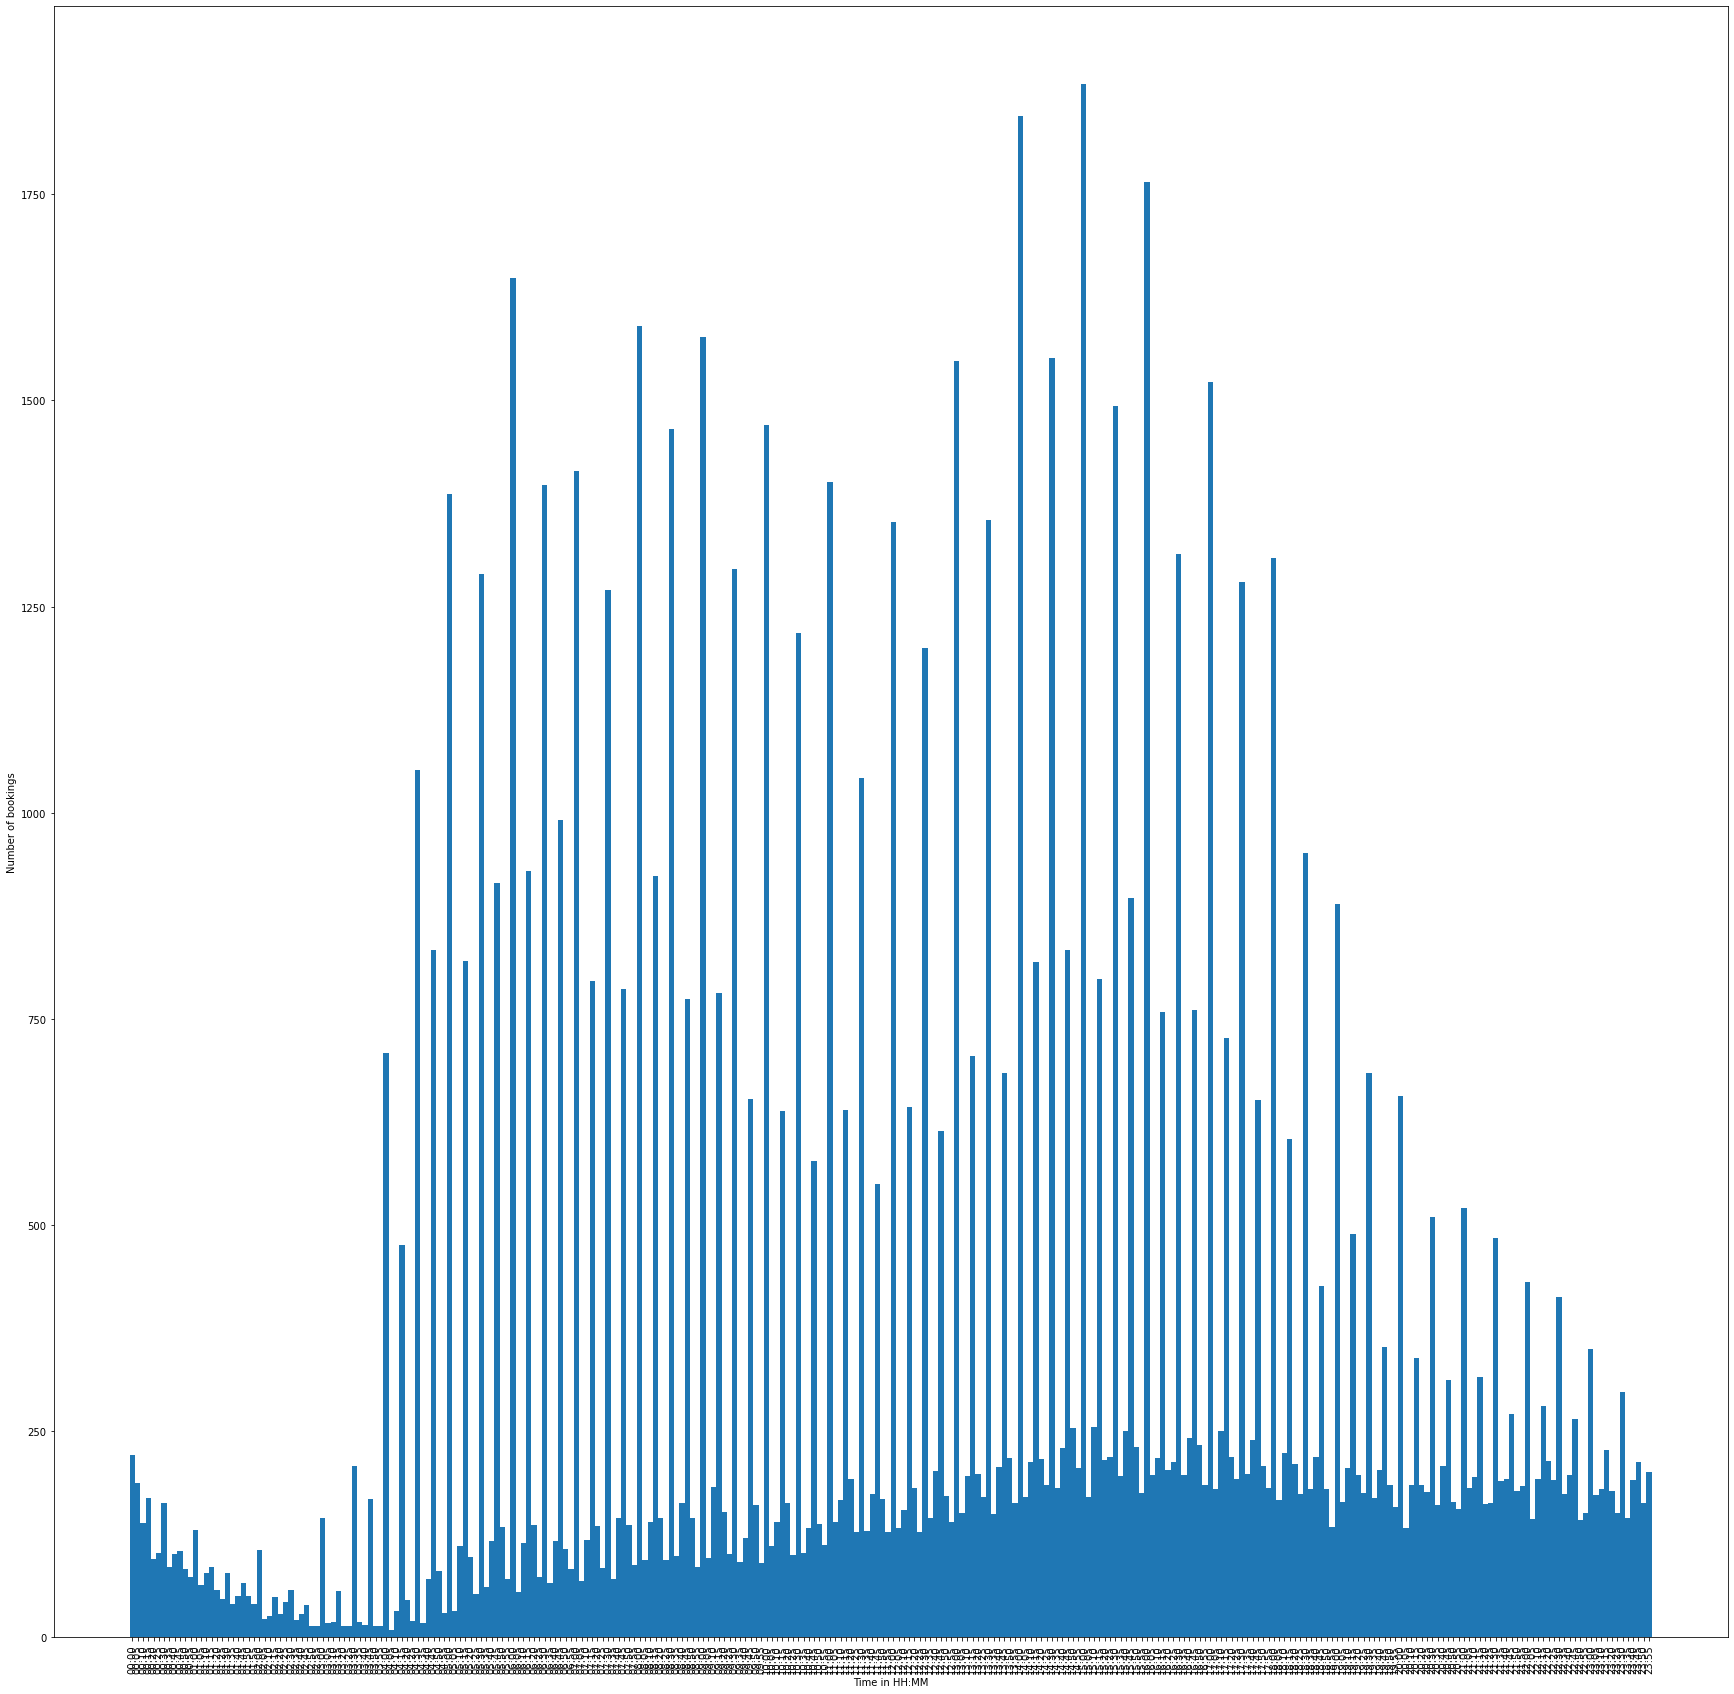

In [18]:
import matplotlib.pyplot as plt
names = [row[0] for row in popular_times_trunced.collect()]
counts = [row[1] for row in popular_times_trunced.collect()]
zipped = list(zip(names, counts))
zipped.sort(key=lambda x: x[0])
names = [e[0] for e in zipped]
counts = [e[1] for e in zipped]
plt.subplots(figsize=(30,30))
plt.bar(range(len(names)), counts, tick_label=names, width=1.0)

plt.ylabel("Number of bookings")
plt.xlabel("Time in HH:MM")
plt.xticks(rotation=90)
plt.show()

# Task 8

#### Most frequent address for each company

In [19]:
from pyspark.sql.functions import col, regexp_replace

def find_most_frequent_address(one_company):
    adr = one_company.select(['PICK_UP_ADDRESS'])
    adr = adr.groupBy("PICK_UP_ADDRESS") \
                .count().sort(col("count").desc())
    adr = adr.filter(adr.PICK_UP_ADDRESS != '                    ')
    adr = adr.filter(adr.PICK_UP_ADDRESS != '                                ')
    return (adr)

In [20]:
limo_companies = ['American_B01362.parquet', 'Carmel_B00256.parquet', 'Dial7_B00887.parquet', 'Diplo_B01196.parquet', 'Federal_02216.parquet', 'Firstclass_B01536.parquet', 'Highclass_B01717.parquet', 'Skyline_B00111.parquet', 'Prestige_B01338.parquet']

if server_mode:
    path = 'hdfs://192.168.2.74:9000/user/ubuntu/uber-tlc-foil-response/other-FHV-data'
else:
    path = os.getcwd() + '/DATA/'

most_freq_dict = {}
for lim in limo_companies:
    FHV_file = path+lim
    one_limo_comp = spark_session.read.parquet(FHV_file)
    tmp5 = find_most_frequent_address(one_limo_comp).collect()[0]

    a_key = [tmp5['PICK_UP_ADDRESS'] for x in tmp5]
    a_value = [tmp5['count'] for x in tmp5]
    most_freq_dict[a_key[0]] = a_value[0]
    print(f'{lim}: {tmp5}')

American_B01362.parquet: Row(PICK_UP_ADDRESS=' 400 Brook Ave Mott Haven, BX', count=1216)
Carmel_B00256.parquet: Row(PICK_UP_ADDRESS='JFK', count=28179)
Dial7_B00887.parquet: Row(PICK_UP_ADDRESS='BROADWAY            ', count=3888)
Diplo_B01196.parquet: Row(PICK_UP_ADDRESS='BASE 170 W Fordham Rd Jerome, BX', count=3293)
Federal_02216.parquet: Row(PICK_UP_ADDRESS='607 20 St., BK NY; DO: John F Kennedy International Airport; ', count=3)
Firstclass_B01536.parquet: Row(PICK_UP_ADDRESS='base 4980 Broadway NYC', count=3137)
Highclass_B01717.parquet: Row(PICK_UP_ADDRESS=' 268 W Fordham Rd Jerome, BX', count=1506)
Skyline_B00111.parquet: Row(PICK_UP_ADDRESS='    1345 SIXTH AV               ', count=1768)
Prestige_B01338.parquet: Row(PICK_UP_ADDRESS='PRESTIGE #1 3108 Webster Ave Bronx', count=2051)


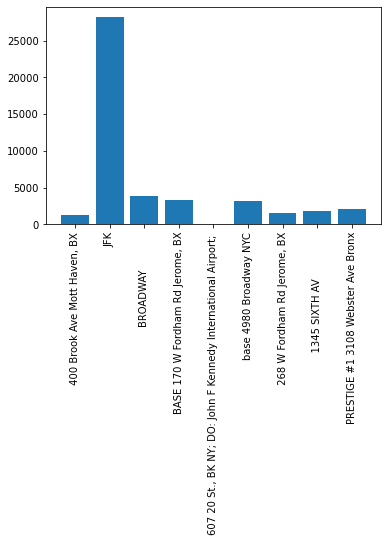

In [21]:
import matplotlib.pyplot as plt

names = list(most_freq_dict.keys())
values = list(most_freq_dict.values())
plt.bar(range(len(most_freq_dict)), values, tick_label=names)

plt.xticks(rotation=90)
plt.show()

# Task 9

### Prepration for Scalability

In [22]:
def bigger_data_frame(any_data_frame, nbr):
    tmp = any_data_frame
    print(tmp.count())
    for i in range(nbr-1):
        tmp = tmp.union(any_data_frame)
    print(tmp.count())
    return tmp

In [23]:
if server_mode:
    path = 'hdfs://192.168.2.74:9000/user/ubuntu/uber-tlc-foil-response/uber-trip-data/'
else:
    path = os.getcwd() + '/DATA/'

path = path + 'uber_raw_data.parquet'
uber_raw_data_read_test = spark_session.read.parquet(path)

In [24]:
scale_2_uber = bigger_data_frame(uber_raw_data_read_test, 2)
print("---")
scale_2_FHV = bigger_data_frame(FHV_10_companies_data, 2)

4534327


9068654
---
1409080
2818160


In [25]:
##### To save the scaled UBER file
if server_mode:
    path = 'hdfs://192.168.2.74:9000/user/ubuntu/uber-tlc-foil-response/uber-trip-data'
else:
    path = os.getcwd() + '/DATA/'

scale_2_file = path+"scale_2_UBER.parquet"
scale_2_uber.write.mode("overwrite").parquet(scale_2_file)

In [26]:
##### To save the scaled FHV file
if server_mode:
    path = 'hdfs://192.168.2.74:9000/user/ubuntu/uber-tlc-foil-response/other-FHV-data'
else:
    path = os.getcwd() + '/DATA/'

scale_2_file = path+"scale_2_FHV.parquet"
scale_2_FHV.write.mode("overwrite").parquet(scale_2_file)

In [27]:
scale_3_uber = bigger_data_frame(uber_raw_data_read_test, 3)
print("---")
scale_3_FHV = bigger_data_frame(FHV_10_companies_data, 3)

4534327


13602981
---
1409080
4227240


In [28]:
##### To save the scaled UBER file
if server_mode:
    path = 'hdfs://192.168.2.74:9000/user/ubuntu/uber-tlc-foil-response/uber-trip-data'
else:
    path = os.getcwd() + '/DATA/'

scale_3_file = path+"scale_3_UBER.parquet"
scale_3_uber.write.mode("overwrite").parquet(scale_3_file)

In [29]:
##### To save the scaled FHV file
if server_mode:
    path = 'hdfs://192.168.2.74:9000/user/ubuntu/uber-tlc-foil-response/other-FHV-data'
else:
    path = os.getcwd() + '/DATA/'

scale_3_file = path+"scale_3_FHV.parquet"
scale_3_FHV.write.mode("overwrite").parquet(scale_3_file)

In [33]:
# a SIMPLE test, to be ready for scalability
# (Count all words in Pick_UP_ADDRESS for all companies)
import time
import pyspark.sql.functions as f
start_time = time.time()
def count_all_words_FHV(a_dataframe):
    a_dataframe = a_dataframe.withColumn\
        ('wordCount', f.size(f.split(f.col('PICK_UP_ADDRESS'), ' ')))
    
    print(f"All number of words: {a_dataframe.select(f.sum('wordCount')).collect()}")
    word_counts = a_dataframe.withColumn('Word', f.explode(\
            f.split(f.col('PICK_UP_ADDRESS'), ' ')))\
            .groupBy('Word').count()\
            .sort('count', ascending=False)

    word_counts = word_counts.filter(word_counts.Word != '')
    word_counts.show(10)
    
    print(f'{round(time.time() - start_time, 2)} seconds!')

In [34]:
count_all_words_FHV(FHV_10_companies_data)

All number of words: [Row(sum(wordCount)=12409597)]


+---------------+------+
|           Word| count|
+---------------+------+
|             BX|608765|
|            AVE|529908|
|             ST|450305|
|            NYC|264768|
|              E|235173|
|              W|162409|
|WILLIAMSBRIDGE,|112728|
|          BRONX| 99491|
|        JEROME,| 73960|
|         MORRIS| 71255|
+---------------+------+
only showing top 10 rows

5.84 seconds!


In [35]:
spark_context.stop()
print("Spark closed!")

Spark closed!
